# Problem Statement: **Cat V/s Dog Classification**

# Description:

**Cat vs dog classification is a popular computer vision task that involves training a model to distinguish between images of cats and dogs. This task can be challenging, as there is a lot of variation in the appearance of cats and dogs, even within the same breed. However, with the use of deep learning techniques, it is possible to achieve high accuracy in cat vs dog classification.**

**One of the most common approaches to cat vs dog classification is to use a convolutional neural network (CNN). CNNs are a type of deep learning model that are specifically designed for image classification tasks. They work by learning to identify patterns in images, and can be trained on large datasets of labeled images.**

**Another approach to cat vs dog classification is to use a transfer learning model. Transfer learning is a technique where a pre-trained model is used as a starting point for training a new model. This can be helpful for cat vs dog classification, as there are many pre-trained CNN models that have been trained on large datasets of images.**

**The accuracy of cat vs dog classification models can vary depending on the dataset used to train the model, the architecture of the model, and the optimization techniques used. However, it is possible to achieve accuracies of over 95% with well-trained models.**

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

In [2]:
image_dir = Path('/kaggle/input/cat-and-dog-images-dataset/Dog and Cat .png')

# Create File DataFrame

In [4]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [5]:
image_df

,Filepath,Label
0,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Dog
1,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Dog
2,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Dog
3,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Dog
4,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Dog
...,...,...
994,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Cat
995,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Cat
996,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Cat
997,/kaggle/input/cat-and-dog-images-dataset/Dog a...,Cat


In [6]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

# Load Image Data

In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)


test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [8]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = val_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 560 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


# Training

In [9]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 19s 897ms/step - loss: 0.6926 - accuracy: 0.5134 - val_loss: 0.6898 - val_accuracy: 0.4964
Epoch 2/100
18/18 [==============================] - 11s 626ms/step - loss: 0.6859 - accuracy: 0.5710 - val_loss: 0.6893 - val_accuracy: 0.5540
Epoch 3/100
18/18 [==============================] - 10s 582ms/step - loss: 0.6894 - accuracy: 0.5249 - val_loss: 0.6891 - val_accuracy: 0.5324
Epoch 4/100
18/18 [==============================] - 11s 646ms/step - loss: 0.6827 - accuracy: 0.5794 - val_loss: 0.6825 - val_accuracy: 0.5755
Epoch 5/100
18/18 [==============================] - 11s 618ms/step - loss: 0.6715 - accuracy: 0.6300 - val_loss: 0.6720 - val_accuracy: 0.6403
Epoch 6/100
18/18 [==============================] - 11s 602ms/step - loss: 0.6762 - accuracy: 0.5773 - val_loss: 0.6878 - val_accuracy: 0.5036
Epoch 7/100
18/18 [==============================] - 11s 612ms/step - loss: 0.6629 - accuracy: 0.5989 - val_loss: 0.6649 - val_accuracy:

# Results

In [10]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 12s 649ms/step - loss: 0.6931 - accuracy: 0.5286 - val_loss: 0.6920 - val_accuracy: 0.4820
Epoch 2/100
18/18 [==============================] - 10s 569ms/step - loss: 0.6918 - accuracy: 0.4865 - val_loss: 0.6896 - val_accuracy: 0.4964
Epoch 3/100
18/18 [==============================] - 10s 565ms/step - loss: 0.6869 - accuracy: 0.5266 - val_loss: 0.6898 - val_accuracy: 0.4964
Epoch 4/100
18/18 [==============================] - 11s 614ms/step - loss: 0.6869 - accuracy: 0.5502 - val_loss: 0.6751 - val_accuracy: 0.5827
Epoch 5/100
18/18 [==============================] - 10s 582ms/step - loss: 0.6721 - accuracy: 0.5801 - val_loss: 0.6790 - val_accuracy: 0.5755
Epoch 6/100
18/18 [==============================] - 10s 580ms/step - loss: 0.6754 - accuracy: 0.5938 - val_loss: 0.6598 - val_accuracy: 0.6043
Epoch 7/100
18/18 [==============================] - 11s 615ms/step - loss: 0.6631 - accuracy: 0.6012 - val_loss: 0.6739 - val_accuracy:

In [11]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.64906
Test Accuracy: 66.00%


In [14]:
results2 = model2.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results2[0]))
print("Test Accuracy: {:.2f}%".format(results2[1] * 100))

    Test Loss: 0.64730
Test Accuracy: 63.67%


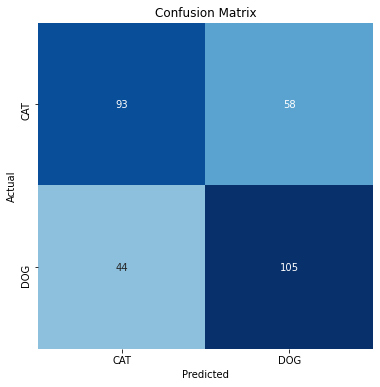

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.68      0.62      0.65       151
         DOG       0.64      0.70      0.67       149

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300



In [12]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)